# Exploratory Data Analysis 

In [1]:
# import required packages
import geopandas as gpd
import pandas as pd
import glob, os, requests
import matplotlib.pyplot as plt

In [2]:
# locate data sources - where every directory containing an individul city data (e.g hdn: Hilden )
url = 'https://raw.github.com/ssujit/move_sustainable/main/data/'

# list all contents

# read files

wkam = 'wkamo_hdn.gpkg' # wkamo: weekdays peak-trafffic morning hours (6:00-8:59) 
wkpm = 'wkpmo_hdn.gpkg' # wkamo: weekdays peak-trafffic afternoon hours (14:00-16:59) 
satam = 'satamo_hdn.gpkg' # satamo: Saturday peak-trafffic morning hours (6:00-8:59) 
satpm = 'satpmo_hdn.gpkg' # satpmo: Saturday peak-trafffic afternoon hours (14:00-16:59)  
sunam = 'sunamo_hdn.gpkg' # sunamo: Saturday peak-trafffic morning hours (6:00-8:59)
sunpm = 'sunamo_hdn.gpkg' # sanpmo: Saturday peak-trafffic afternoon hours (14:00-16:59)  


# read data 
wk_am = gpd.read_file(f'{url}{wkam}')
wk_pm = gpd.read_file(f'{url}{wkpm}')
sat_am = gpd.read_file(f'{url}{satam}')
sat_pm = gpd.read_file(f'{url}{satpm}')
sun_am = gpd.read_file(f'{url}{sunam}')
sun_pm = gpd.read_file(f'{url}{sunpm}')

In [ ]:
# print head and describe attributes

<Axes: >

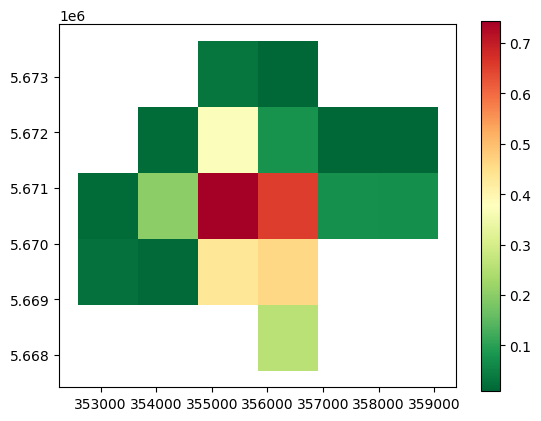

In [3]:
# plot map data
wk_am.plot("pti", cmap="RdYlGn_r", legend=True)

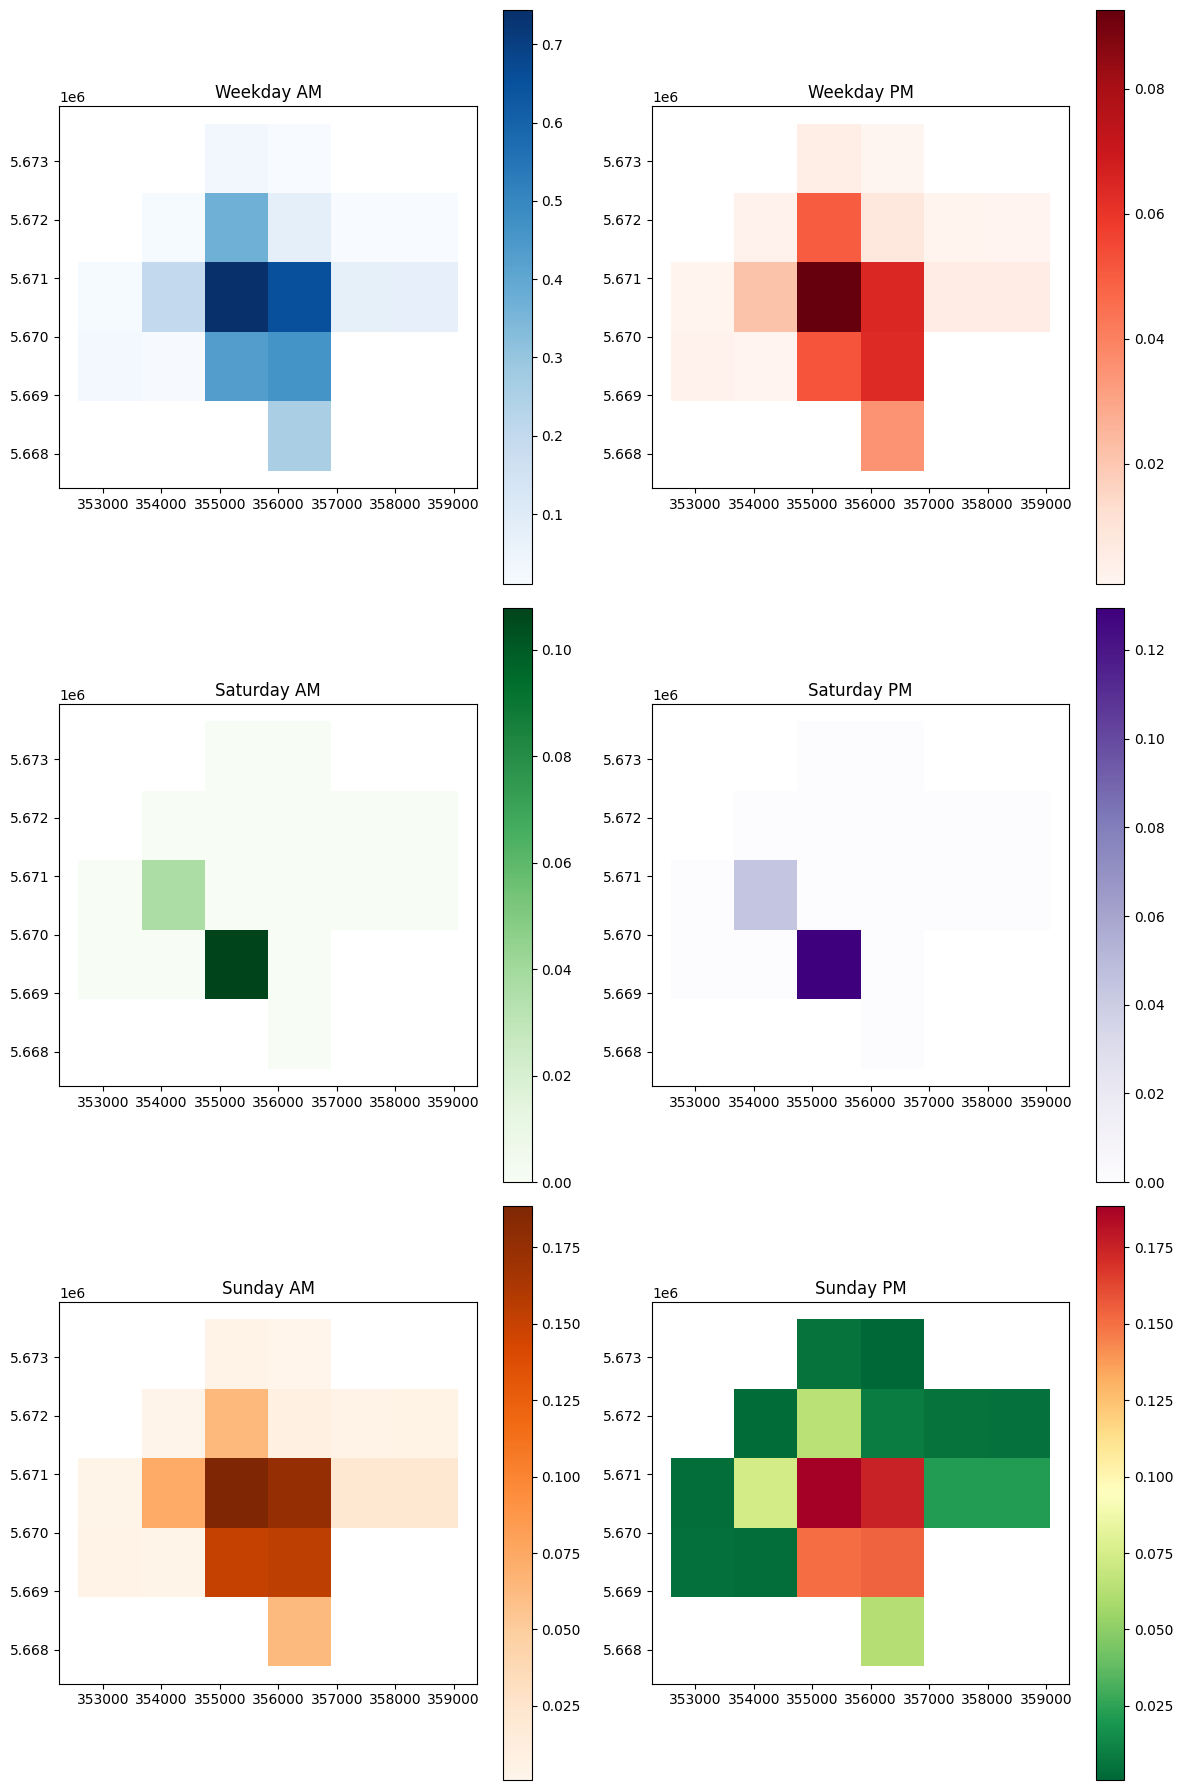

In [4]:
# Set up subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 18))

#graduated_cmap = LinearSegmentedColormap.from_list('graduated_cmap', ['#d73027', '#fee08b', '#4575b4'])

wk_am.plot("pti", cmap="Blues", legend=True, ax=axes[0, 0])
axes[0, 0].set_title("Weekday AM")

wk_pm.plot("pti", cmap="Reds", legend=True, ax=axes[0, 1])
axes[0, 1].set_title("Weekday PM")

sat_am.plot("pti", cmap="Greens", legend=True, ax=axes[1, 0])
axes[1, 0].set_title("Saturday AM")

sat_pm.plot("pti", cmap="Purples", legend=True, ax=axes[1, 1])
axes[1, 1].set_title("Saturday PM")

sun_am.plot("pti", cmap="Oranges", legend=True, ax=axes[2, 0])
axes[2, 0].set_title("Sunday AM")

sun_pm.plot("pti", cmap="RdYlGn_r", legend=True, ax=axes[2, 1])
axes[2, 1].set_title("Sunday PM")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

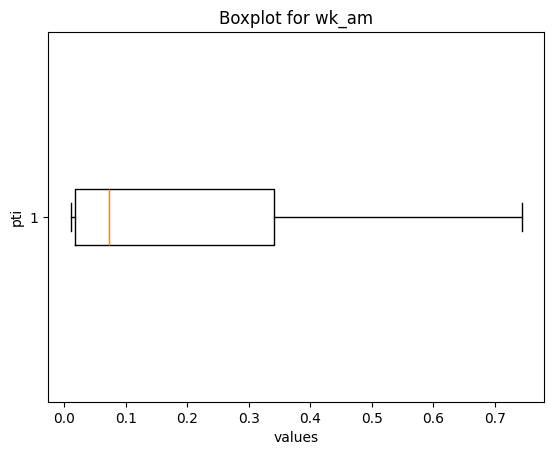

In [5]:
# define boxplot 
plt.boxplot(wk_am['pti'].dropna(), vert =False)

# Add labels and title
plt.xlabel('values')
plt.ylabel('pti')
plt.title('Boxplot for weekdays morning hours')

# Show the plot
plt.show()

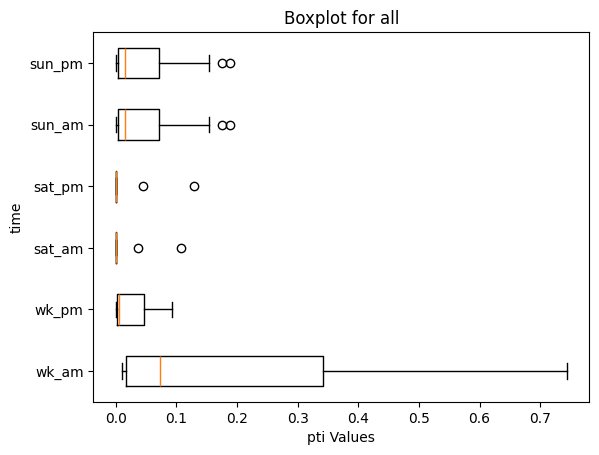

In [6]:
# define boxplot 

pti_values = [df['pti'].dropna() for df in [wk_am, wk_pm, sat_am, sat_pm, sun_am, sun_pm]]
plt.boxplot(pti_values, labels=['wk_am', 'wk_pm', 'sat_am', 'sat_pm', 'sun_am', 'sun_pm'], vert=False)

# Add labels and title
plt.xlabel('pti Values')
plt.ylabel('time')
plt.title('Boxplot for a week')

# Show the plot
plt.show()

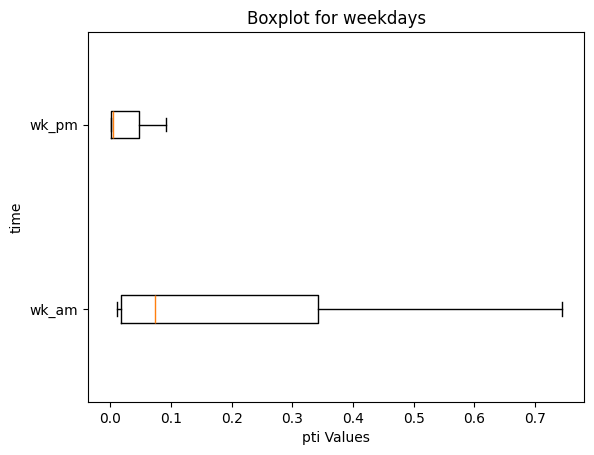

In [7]:
# define boxplot 
pti_values = [df['pti'].dropna() for df in [wk_am, wk_pm]]
plt.boxplot(pti_values, labels=['wk_am', 'wk_pm'], vert=False)

# Add labels and title
plt.xlabel('pti Values')
plt.ylabel('time')
plt.title('Boxplot for weekdays Only')

# Show the plot
plt.show()

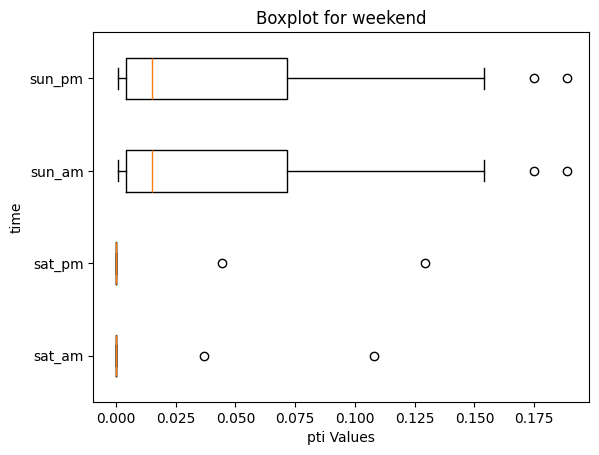

In [8]:
# define boxplot 
pti_values = [df['pti'].dropna() for df in [sat_am, sat_pm, sun_am, sun_pm]]

# Create a boxplot for all 'pti' values
plt.boxplot(pti_values, labels=['sat_am', 'sat_pm', 'sun_am', 'sun_pm'], vert = False)

# Add labels and title
plt.xlabel('pti Values')
plt.ylabel('time')
plt.title('Boxplot for weekend only')

# Show the plot
plt.show()

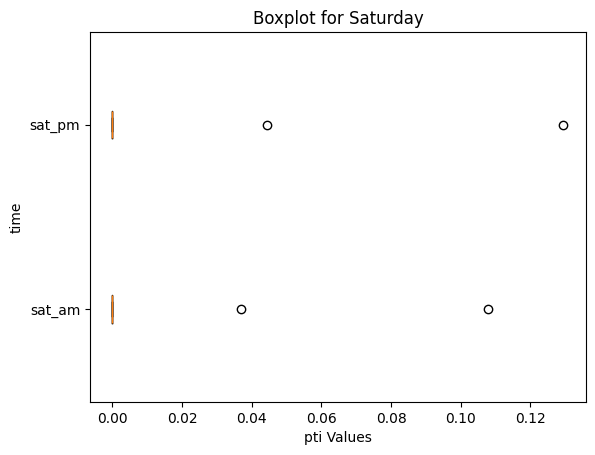

In [9]:
# define boxplot 
pti_values = [df['pti'].dropna() for df in [sat_am, sat_pm]]

# Create a boxplot for all 'pti' values
plt.boxplot(pti_values, labels=['sat_am', 'sat_pm'], vert = False)

# Add labels and title
plt.xlabel('pti Values')
plt.ylabel('time')
plt.title('Boxplot for Saturday only')

# Show the plot
plt.show()

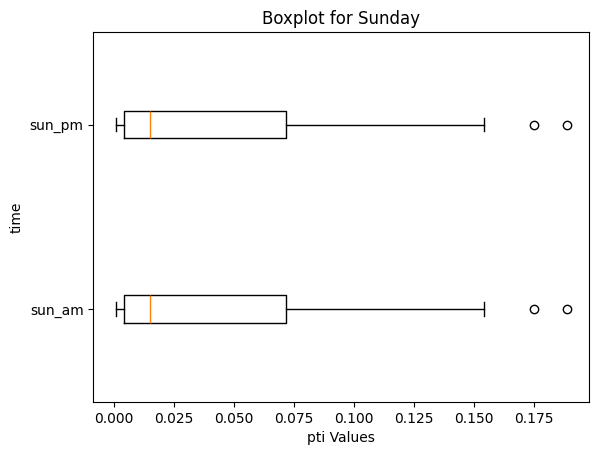

In [10]:
# define boxplot 
pti_values = [df['pti'].dropna() for df in [sun_am, sun_pm]]

# Create a boxplot for all 'pti' values
plt.boxplot(pti_values, labels=['sun_am', 'sun_pm'], vert = False)

# Add labels and title
plt.xlabel('pti Values')
plt.ylabel('time')
plt.title('Boxplot for Sunday only')

# Show the plot
plt.show()